#Project Name - **Amazon Prime TV Shows and Movies Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual


#### **BUSINESS OVERVIEW**

In today's competitive streaming industry, platforms like Amazon Prime Video are constantly expanding their content libraries to cater to diverse audiences. With a growing number of shows and movies available on the platform, data-driven insights play a crucial role in understanding trends, audience preferences, and content strategy.

This data set was created to list all shows available on Amazon Prime streaming, and analyze the data to find interesting facts. This dataset has data available in the United States.

# **Problem Statement**

**BUSINESS PROBLEM OVERVIEW**

In today’s competitive streaming landscape, Amazon Prime Video must leverage data to guide **content strategy** and **user engagement**.

This project analyzes its U.S. content library to identify trends in **genres**, show types, **release patterns**, and **ratings**.

The insights will help stakeholders make informed decisions on content planning and investment.


#### **Define Your Business Objective?**

-  *Identify key content trends on Amazon Prime Video to support data-driven content*

-  *User engagement strategies on key area.*

# **General Guidelines** : -  

1. Explore both datasets (titles.csv, credits.csv)

2. Clean data: handle nulls, correct types, parse lists

3. Analyze show types, genres, years, regions, ratings

4. Visualize using at least 5 different chart types

5. Join datasets to study actor/director trends

6. Extract insights relevant to content strategy

7. Present clearly with concise plots and summaries

# **Project**


## 1. **Dataset Overview**

### 1.1 *Libraries used*

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 1.2 *Dataset Loading*

In [4]:
csv_url_titles = 'https://drive.google.com/uc?id=1VsVl6xTefl2320WkuM1DGkLJFc58KfX8'
csv_url_data_credits = 'https://drive.google.com/uc?id=1k8XUK0Bq_C89EZ5X0SaRGd3GQB0GWvjY'
data_titles = pd.read_csv(csv_url_titles)
data_credits = pd.read_csv(csv_url_data_credits)# URL for titles data
csv_url_titles = 'https://drive.google.com/uc?id=1VsVl6xTefl2320WkuM1DGkLJFc58KfX8'

# URL for credits data
csv_url_data_credits = 'https://drive.google.com/uc?id=1k8XUK0Bq_C89EZ5X0SaRGd3GQB0GWvjY'

# Load titles data into DataFrame
data_titles = pd.read_csv(csv_url_titles)

# Load credits data into DataFrame
data_credits = pd.read_csv(csv_url_data_credits)


### 1.3 *Dataset First view*

The dataset includes two CSV files:

one containing content details and another with cast and crew information.

In [5]:
data_titles.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [6]:
data_titles.tail(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
9870,ts275838,Waking Up Eighty,SHOW,"Kara Stewart, 16, is fed up with just about ev...",2021,NaN,10,['drama'],[],1.0,tt13542552,NaN,NaN,NaN,NaN


In [7]:
data_credits.head(5)

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [8]:
data_credits.tail(5)

,person_id,id,name,character,role
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR
124234,1938620,tm1054116,Vishwa Bhanu,NaN,DIRECTOR


### 1.4 *Dataset information*

In [9]:
print(data_titles.info())
print("\n")
print(data_credits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#### **Dataset Shape**

In [10]:
print(f"the content titles row columns: {data_titles.shape}")
print(f"the cast credits row columns: {data_credits.shape}")

the content titles row columns: (9871, 15)
the cast credits row columns: (124235, 5)


#### **Missing Values**

In [11]:
print("missing value in titles")
print(data_titles.isnull().sum())
print("\nmissing value in credits")
print(data_credits.isnull().sum())

missing value in titles
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

missing value in credits
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


The above figure explains the missing values across both datasets — `data_titles` and `data_credits` — where yellow (or brighter) cells indicate missing entries. From the heatmaps, we can observe which specific columns contain null values and how frequently they occur, helping us identify which features may need cleaning, imputation, or removal.

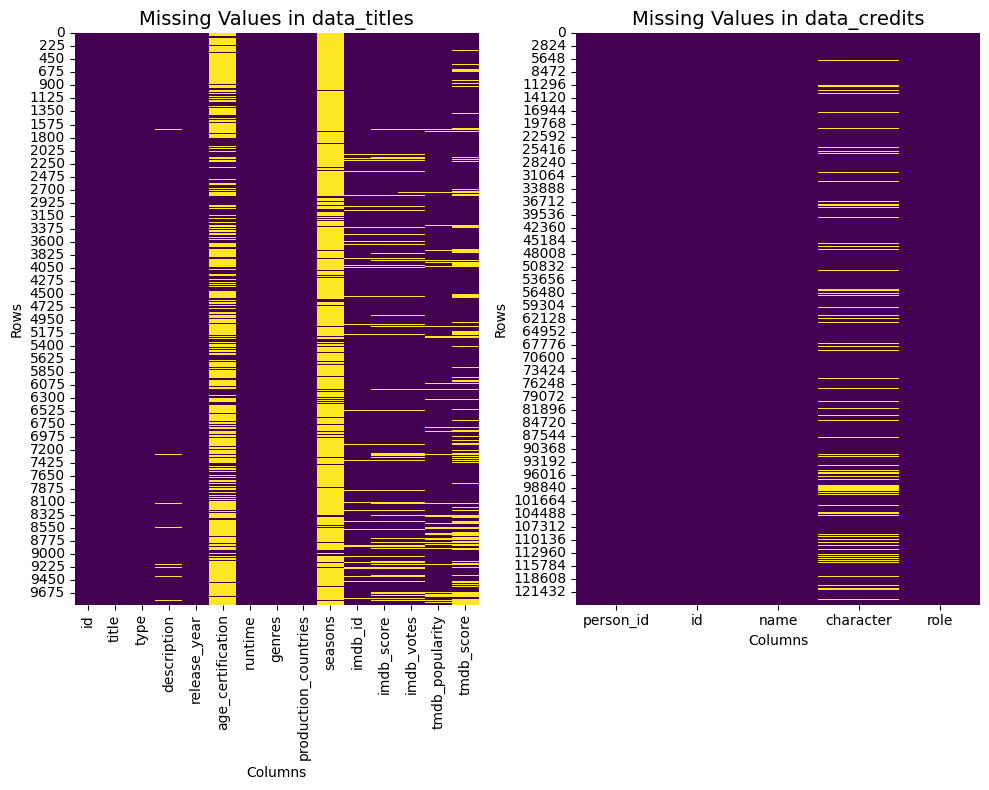

In [12]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# Heatmap for data_titles
sns.heatmap(data_titles.isnull(),
            ax=axes[0],
            cbar=False,
            cmap="viridis")
axes[0].set_title("Missing Values in data_titles", fontsize=14)
axes[0].set_xlabel("Columns")
axes[0].set_ylabel("Rows")

# Heatmap for data_credits
sns.heatmap(data_credits.isnull(),
            ax=axes[1],
            cbar=False,
            cmap="viridis")
axes[1].set_title("Missing Values in data_credits", fontsize=14)
axes[1].set_xlabel("Columns")
axes[1].set_ylabel("Rows")

plt.tight_layout()
plt.show()

#### **Duplicate Values**

Duplicate IDs found in titles data — `tm89134` (rows 479 & 480), `tm66674` (rows 718 & 720), and `tm137955` (rows 719 & 722).

In [13]:
# Find all duplicate rows in titles data
duplicates_on_titles = data_titles[data_titles.duplicated(keep=False)]

# Show the duplicate rows
duplicates_on_titles


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
479,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
718,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
719,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN


Duplicate IDs found in credits data — there are 112 duplicates.

In [14]:
# Find all duplicate rows in credits data
duplicates_on_credits = data_credits[data_credits.duplicated(keep=False)]

# Sort the duplicates by person_id
duplicates_on_credits_sorted = duplicates_on_credits.sort_values(by='person_id')

# Print the total number of duplicates
print(f"The number of duplicates in the credits is {len(duplicates_on_credits_sorted)}")

# Show the sorted duplicate rows
duplicates_on_credits_sorted


The number of duplicates in the credits is 112


,person_id,id,name,character,role
12957,13331,tm66674,Irving Bacon,Jake,ACTOR
12989,13331,tm66674,Irving Bacon,Jake,ACTOR
9170,13370,tm89134,Kernan Cripps,Al,ACTOR
9146,13370,tm89134,Kernan Cripps,Al,ACTOR
12970,13427,tm66674,Dan White,Skipper Brown (uncredited),ACTOR
...,...,...,...,...,...
12981,576342,tm137955,Clarence Geldart,Dr. Fleming,ACTOR
12983,576620,tm137955,Finis Barton,Gladys,ACTOR
13035,576620,tm137955,Finis Barton,Gladys,ACTOR
9172,685522,tm89134,Frederick Gee,Gibbs Baby,ACTOR


## 2. **Understanding Dataset Variable**

In [15]:
print("The columns in titles data are--> ")
print(data_titles.columns)
print("\nThe columns in credits data are--> ")
print(data_credits.columns)

The columns in titles data are--> 
Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

The columns in credits data are--> 
Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


In [16]:
# Show summary stats for all numeric columns in titles data
data_titles.select_dtypes(include=['number']).describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,9871.0,2001.327221,25.810071,1912.000000,1995.500,2014.000,2018.000,2022.000
runtime,9871.0,85.973052,33.512466,1.000000,65.000,89.000,102.000,549.000
seasons,1357.0,2.791452,4.148958,1.000000,1.000,1.000,3.000,51.000
imdb_score,8850.0,5.976395,1.343842,1.100000,5.100,6.100,6.900,9.900
imdb_votes,8840.0,8533.614253,45920.151905,5.000000,117.000,462.500,2236.250,1133692.000
tmdb_popularity,9324.0,6.910204,30.004098,0.000011,1.232,2.536,5.634,1437.906
tmdb_score,7789.0,5.984247,1.517986,0.800000,5.100,6.000,6.900,10.000


### 2.1 **Variables Description**

This dataset contains +9k unique titles on Amazon Prime with 15 columns containing their information, including:

 * id: The title ID on JustWatch.
 * title: The name of the title.
 * show_type: TV show or movie.
 * description: A brief description.
 * release_year: The release year.
 * age_certification: The age certification.
 * runtime: The length of the episode (SHOW) or movie.
 * genres: A list of genres.
 * production_countries: A list of countries that produced the title.
 * seasons: Number of seasons if it's a SHOW.
 * imdb_id: The title ID on IMDB.
 * imdb_score: Score on IMDB.
 * imdb_votes: Votes on IMDB.
 * tmdb_popularity: Popularity on TMDB.
 * tmdb_score: Score on TMDB.

Over +124k credits of actors and directors on Amazon Prime titles with 5 columns containing their information:

 * person_ID: The person ID on JustWatch.
 * id: The title ID on JustWatch.
 * name: The actor or director's name.
 * character_name: The character name.
 * role: ACTOR or DIRECTOR.

### 2.2 **Variables DataType**

In [17]:
print(f"The data type of the title data is--> \n{data_titles.dtypes}")

The data type of the title data is--> 
id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object


In [18]:
print(f"The data type of the title data is--> \n{data_credits.dtypes}")

The data type of the title data is--> 
person_id     int64
id           object
name         object
character    object
role         object
dtype: object


### 2.3 **Variables unique values**

In [19]:
data_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [20]:
# Loop through object-type columns, excluding specific ones
for i in data_titles.select_dtypes(include=['object']):
  if i not in ['id','title','description','production_countries','imdb_id']:
    # Print unique values in the column
    print(f"The Column name : [{i}] contain following values:\n")
    print(data_titles.loc[:,i].unique())
    print("\n")

    # Print count of each unique value
    print(f"The total value count of {data_titles.value_counts(i)}")
    print("\n\n")


The Column name : [type] contain following values:

['SHOW' 'MOVIE']


The total value count of type
MOVIE    8514
SHOW     1357
Name: count, dtype: int64



The Column name : [age_certification] contain following values:

['TV-PG' nan 'PG' 'G' 'PG-13' 'R' 'TV-G' 'TV-Y' 'TV-14' 'NC-17' 'TV-Y7'
 'TV-MA']


The total value count of age_certification
R        1249
PG-13     588
PG        582
G         269
TV-MA     217
TV-14     188
TV-PG      91
TV-Y       78
TV-G       57
TV-Y7      52
NC-17      13
Name: count, dtype: int64



The Column name : [genres] contain following values:

["['comedy', 'family', 'animation', 'action', 'fantasy', 'horror']"
 "['action', 'drama', 'war', 'western', 'comedy', 'european']"
 "['romance', 'war', 'drama']" ... "['drama', 'family', 'thriller']"
 "['thriller', 'western', 'comedy']" "['comedy', 'action', 'family']"]


The total value count of genres
['drama']                                                            908
['comedy']                         

In [21]:
# Loop through object-type columns in credits data, excluding some
for i in data_credits.select_dtypes(include=['object']):
  if i not in ['id','name','character']:
    # Print unique values in the column
    print(f"The Column name : [{i}] contain following values:\n")
    print(data_credits.loc[:,i].unique())
    print("\n")

    # Print count of each unique value
    print(f"The total value count of {data_credits.value_counts(i)}")
    print("\n\n")


The Column name : [role] contain following values:

['ACTOR' 'DIRECTOR']


The total value count of role
ACTOR       115846
DIRECTOR      8389
Name: count, dtype: int64





## 3. **Handeling Missing Values**

**Missing Value in Titles**

In [22]:
# Calculate percentage of missing values in each column of titles data
(data_titles.isnull().sum()/len(data_titles))*100

,0
id,0.000000
title,0.000000
type,0.000000
description,1.205552
release_year,0.000000
age_certification,65.717759
runtime,0.000000
genres,0.000000
production_countries,0.000000
seasons,86.252659


In [23]:
data_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

From the above we can see missing percentage of columns age_certification and seasons are more than 50% this may lead to miss leading conclusion where we may safely drop the columns

In [24]:
# Drop 'seasons' and 'age_certification' columns from titles data
data_titles.drop(["seasons","age_certification"], axis=1, inplace=True)

After columns drop the result is :-

In [25]:
# Recheck percentage of missing values after dropping columns
(data_titles.isnull().sum()/len(data_titles))*100

,0
id,0.000000
title,0.000000
type,0.000000
description,1.205552
release_year,0.000000
runtime,0.000000
genres,0.000000
production_countries,0.000000
imdb_id,6.757167
imdb_score,10.343430


In [26]:
data_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year', 'runtime',
       'genres', 'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [27]:
# Check if 'imdb_score' is approximately normally distributed
print(f"imdb_score : {data_titles.loc[:,'imdb_score'].skew()>-0.5 and data_titles.loc[:,'imdb_score'].skew()<0.5}")

# Check if 'imdb_votes' is approximately normally distributed
print(f"imdb_votes : {data_titles.loc[:,'imdb_votes'].skew()>-0.5 and data_titles.loc[:,'imdb_votes'].skew()<0.5}")

# Check if 'tmdb_popularity' is approximately normally distributed
print(f"tmdb_popularity : {data_titles.loc[:,'tmdb_popularity'].skew()>-0.5 and data_titles.loc[:,'tmdb_popularity'].skew()<0.5}")

# Check if 'tmdb_score' is approximately normally distributed
print(f"tmdb_score : {data_titles.loc[:,'tmdb_score'].skew()>-0.5 and data_titles.loc[:,'tmdb_score'].skew()<0.5}")


imdb_score : True
imdb_votes : False
tmdb_popularity : False
tmdb_score : True


-  imdb_score : Normal distribution (mean)
-  imdb_votes : Skewed (median)
-  tmdb_popularity : Skewed (median)
-  tmdb_score : Normal distribution (mean)

In [28]:
# Fill missing 'imdb_score' with its mean
data_titles.loc[:,"imdb_score"].fillna(data_titles.loc[:,"imdb_score"].mean(), inplace=True)

# Fill missing 'imdb_votes' with its median
data_titles.loc[:,"imdb_votes"].fillna(data_titles.loc[:,"imdb_votes"].median(), inplace=True)

# Fill missing 'tmdb_popularity' with its median
data_titles.loc[:,"tmdb_popularity"].fillna(data_titles.loc[:,"tmdb_popularity"].median(), inplace=True)

# Fill missing 'tmdb_score' with its mean
data_titles.loc[:,"tmdb_score"].fillna(data_titles.loc[:,"tmdb_score"].mean(), inplace=True)

# Check missing value percentage again
(data_titles.isnull().sum()/len(data_titles))*100


/tmp/ipython-input-28-783688968.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_titles.loc[:,"imdb_score"].fillna(data_titles.loc[:,"imdb_score"].mean(),inplace=True)
/tmp/ipython-input-28-783688968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

,0
id,0.000000
title,0.000000
type,0.000000
description,1.205552
release_year,0.000000
runtime,0.000000
genres,0.000000
production_countries,0.000000
imdb_id,6.757167
imdb_score,0.000000


- Since the description and imdb are the columns carry unique charcter and at null place we can't replace by a mode of the columns which may lead to meaningless data so right now we ignore this columns.

- we are also not deleting this row because in further we may not use the columns for any operation

**Missing Value in Credits**

In [29]:
# Calculate percentage of missing values in each column of credits data
(data_credits.isnull().sum()/len(data_credits))*100

,0
person_id,0.000000
id,0.000000
name,0.000000
character,13.109832
role,0.000000


In [30]:
# Count occurrences of each unique value in the 'character' column
data_credits.loc[:,"character"].value_counts()

,count
character,
Himself,1540
Self,1245
Herself,418
Henchman,242
Dancer,221
...,...
Menelaus 'Pappy' O'Daniel,1
Washington B. 'Wash' Hogwallop,1
Penny Wharvey-McGill,1


So character is also a unique value associated to the person and his role

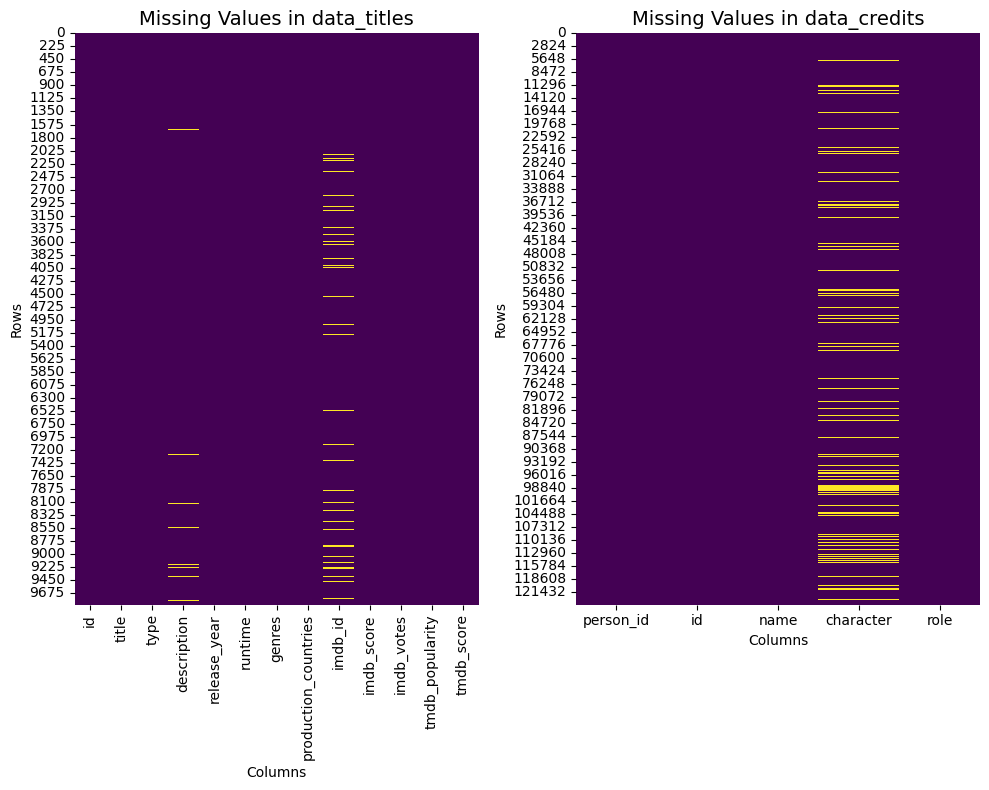

In [31]:
# Create side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# Heatmap for missing values in data_titles
sns.heatmap(data_titles.isnull(),
            ax=axes[0],
            cbar=False,
            cmap="viridis")
axes[0].set_title("Missing Values in data_titles", fontsize=14)
axes[0].set_xlabel("Columns")
axes[0].set_ylabel("Rows")

# Heatmap for missing values in data_credits
sns.heatmap(data_credits.isnull(),
            ax=axes[1],
            cbar=False,
            cmap="viridis")
axes[1].set_title("Missing Values in data_credits", fontsize=14)
axes[1].set_xlabel("Columns")
axes[1].set_ylabel("Rows")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## 4. **Handeling Duplicates**

In [32]:
# Find all duplicate rows in titles data
duplicates_on_titles = data_titles[data_titles.duplicated(keep=False)]

# Print number of duplicate rows
print(len(duplicates_on_titles))

# Show the duplicate rows
duplicates_on_titles


6


,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
479,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,62,['western'],['US'],tt0033683,5.9,133.0,0.991,7.000000
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,62,['western'],['US'],tt0033683,5.9,133.0,0.991,7.000000
718,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,68,"['drama', 'crime']",['US'],tt0039343,5.0,24.0,0.841,5.984247
719,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,68,"['drama', 'romance']",['US'],tt0023849,5.8,74.0,0.600,5.984247
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,68,"['drama', 'crime']",['US'],tt0039343,5.0,24.0,0.841,5.984247
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,68,"['drama', 'romance']",['US'],tt0023849,5.8,74.0,0.600,5.984247


In [33]:
# Drop duplicate rows, keeping the first occurrence
data_titles = data_titles.drop_duplicates(keep='first')

# Check for any remaining duplicates
data_titles[data_titles.duplicated(keep=False)]


,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [34]:
# Find all duplicate rows in credits data
duplicates_on_credits = data_credits[data_credits.duplicated(keep=False)]

# Sort duplicates by 'person_id'
duplicates_on_credits_sorted = duplicates_on_credits.sort_values(by='person_id')

# Print number of duplicate rows
print(f"The number of duplicates in the credits is {len(duplicates_on_credits_sorted)}")

# Show the sorted duplicate rows
duplicates_on_credits_sorted


The number of duplicates in the credits is 112


,person_id,id,name,character,role
12957,13331,tm66674,Irving Bacon,Jake,ACTOR
12989,13331,tm66674,Irving Bacon,Jake,ACTOR
9170,13370,tm89134,Kernan Cripps,Al,ACTOR
9146,13370,tm89134,Kernan Cripps,Al,ACTOR
12970,13427,tm66674,Dan White,Skipper Brown (uncredited),ACTOR
...,...,...,...,...,...
12981,576342,tm137955,Clarence Geldart,Dr. Fleming,ACTOR
12983,576620,tm137955,Finis Barton,Gladys,ACTOR
13035,576620,tm137955,Finis Barton,Gladys,ACTOR
9172,685522,tm89134,Frederick Gee,Gibbs Baby,ACTOR


In [35]:
# Drop duplicate rows in credits data, keeping the first occurrence
data_credits = data_credits.drop_duplicates(keep='first')

# Check for any remaining duplicates
data_credits[data_credits.duplicated(keep=False)]


,person_id,id,name,character,role


## 5. **Visualisation**

### chart - 1 Content distribution between Movies and Show (Univariate)

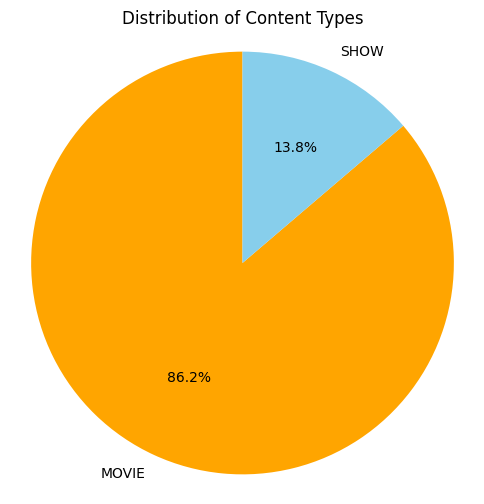

In [36]:
# Count each content type (e.g., movie, show)
type_counts = data_titles['type'].value_counts()

# Plot the distribution as a pie chart
plt.figure(figsize=(6,6))
plt.pie(type_counts,
        labels=type_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['orange','skyblue'])
plt.title('Distribution of Content Types')
plt.axis('equal')  # Make the pie chart a circle
plt.show()


#### 1. Why did you pick the specific chart?

I picked the pie chart because it’s a simple and clear way to show how much each content type (like Movie or TV Show) contributes to the total. It quickly shows proportions using slices, which makes it easy to compare at a glance.

#### 2. What is/are the insight(s) found from the chart?

Insight: The chart shows that the majority of content on the platform is Movies, making up about 86%, while TV Shows account for only 14%. This suggests that the platform focuses more on movie content than series.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart shows that 86% of content is movies and only 14% is TV shows. This insight helps focus on promoting popular movie genres, which can boost engagement. However, the low share of TV shows may hurt user retention, as long-form content keeps users on the platform longer. To avoid negative growth, the platform should consider adding more TV shows to balance user preferences and stay competitive.

### chart - 2 Amazon Prime’s content evolved over years? (Univariate)

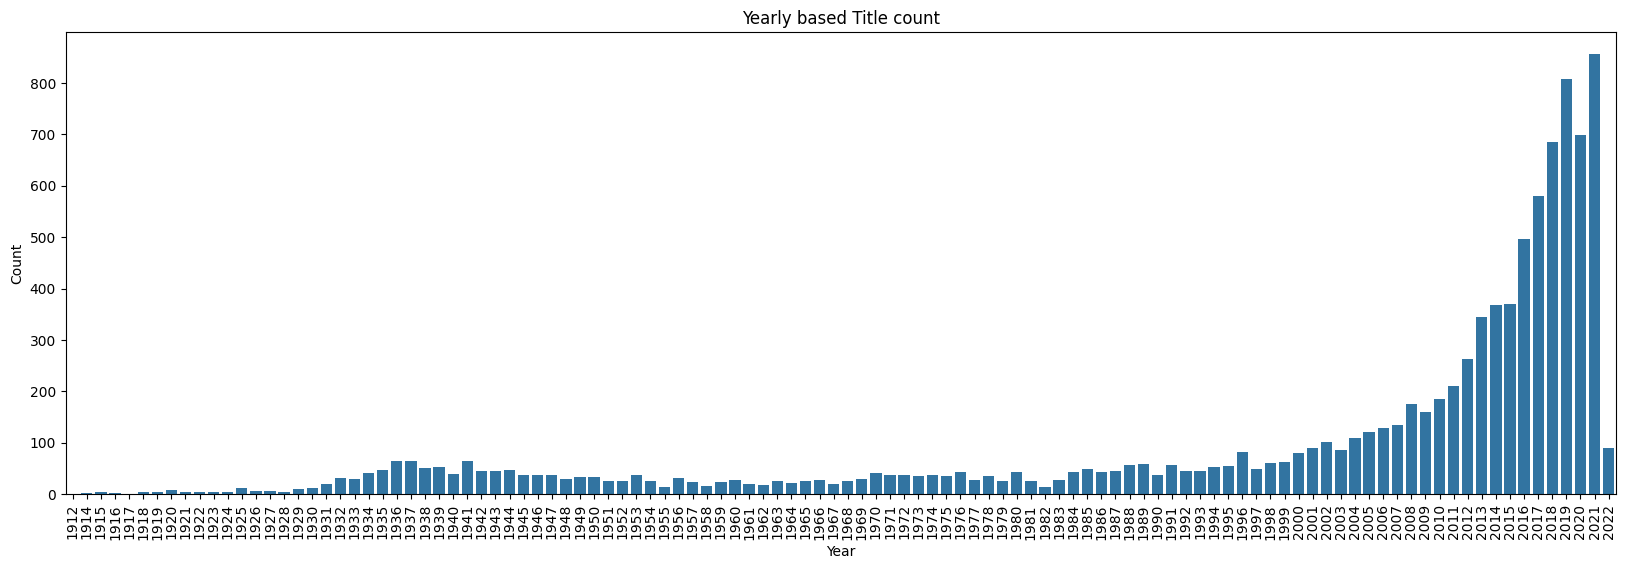

In [37]:
# Count plot for number of titles released each year
plt.figure(figsize=(20, 6))
sns.countplot(data=data_titles, x='release_year')

plt.title('Yearly based Title count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


#### 1. Why did you pick the specific chart?

I used a bar chart because it clearly shows the number of titles released each year, making it easy to spot growth or decline trends over time

#### 2. What is/are the insight(s) found from the chart?

There’s a sharp increase in content starting around 2010, peaking around 2020. This indicates a strong expansion in the platform’s content library in recent years.

#### 3. Will the gained insights help create a positive business impact? Any negative growth?

Yes, this insight shows that content production and acquisition have scaled up, supporting platform growth.
However, there is a drop after 2021, which might signal a slowdown due to external factors (e.g., COVID impact, shifting strategies), and should be monitored.

### chart - 3 Top 10 production Countries (Univariate)

In [38]:
# Convert string representation of a list to an actual list, else return NaN
def str_to_list(list_v1):
    imp = eval(list_v1)
    if len(imp) != 0:
        return imp
    else:
        return np.nan


In [39]:
# Convert string to list in 'production_countries' column
country = data_titles.loc[:,"production_countries"].apply(str_to_list)

# Convert to DataFrame
country = pd.DataFrame(country)

# Flatten the country lists into a single column
country_name = country.loc[:,'production_countries'].explode()

# Count occurrences of each country
country_name_count = country_name.value_counts()

# Show top 5 most frequent countries
country_name_count.head(5)


,count
production_countries,
US,5331
IN,1072
GB,928
CA,530
FR,250


/tmp/ipython-input-40-4181142216.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


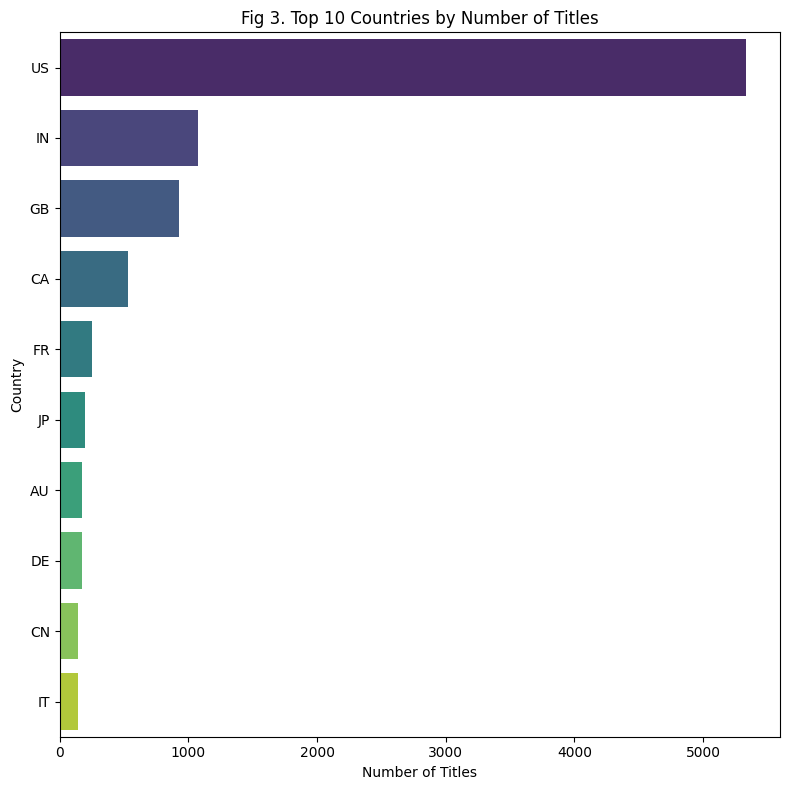

In [40]:
# Bar plot of top 10 countries by number of titles
plt.figure(figsize=(8, 8))

top_countries = country_name_count.sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Fig 3. Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')

plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

A horizontal bar chart is best for showing country names clearly and comparing the number of titles across countries.

#### 2. What is/are the insight(s) found from the chart?

The US production dominates the content library, followed by India production and the UK production. These three countries contribute the majority of titles on the platform.

#### 3. Will the gained insights help create a positive business impact? Any negative growth?

Yes. This insight helps identify which countries contribute the most content, guiding regional licensing and production strategies.
However, the low content share from many other regions may limit global appeal. Expanding production or licensing in underrepresented countries can improve global user engagement.

### chart - 4 IMDB and TMDB based high performing genres (Bivariate)

In [41]:
# Check data type of the first 'genres' entry before conversion
print(type(data_titles.loc[0,'genres']))

# Convert string to list in 'genres' column
data_titles.loc[:,'genres'] = data_titles.loc[:,'genres'].apply(str_to_list)

# Check data type of the first 'genres' entry after conversion
print(type(data_titles.loc[0,'genres']))


<class 'str'>
<class 'list'>


In [42]:
# Check data type of the first 'production_countries' entry before conversion
print(type(data_titles.loc[0,'production_countries']))

# Convert string to list in 'production_countries' column
data_titles.loc[:,'production_countries'] = data_titles.loc[:,'production_countries'].apply(str_to_list)

# Check data type of the first 'production_countries' entry after conversion
print(type(data_titles.loc[0,'production_countries']))


<class 'str'>
<class 'list'>


In [43]:
# Expand 'genres' and 'production_countries' so each value gets its own row
df_titles_explode = data_titles.explode('genres').explode('production_countries')

# Display first 5 rows of the exploded DataFrame
df_titles_explode.head(5)


,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,comedy,US,tt0850645,8.6,1092.0,15.424,7.6
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,family,US,tt0850645,8.6,1092.0,15.424,7.6
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,animation,US,tt0850645,8.6,1092.0,15.424,7.6
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,action,US,tt0850645,8.6,1092.0,15.424,7.6
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,fantasy,US,tt0850645,8.6,1092.0,15.424,7.6


In [44]:
# Print percentage of missing values in 'production_countries' before dropping
print(f"percentage of NULL value in production_countries columns {(df_titles_explode.loc[:,'production_countries'].isnull().sum()/len(df_titles_explode.loc[:,'production_countries']))*100:.2f}%")

# Drop rows where 'production_countries' is null
df_titles_explode = df_titles_explode.dropna(subset=['production_countries'])

# Print percentage of missing values in 'production_countries' after dropping
print(f"percentage of NULL value in production_countries columns {(df_titles_explode.loc[:,'production_countries'].isnull().sum()/len(df_titles_explode.loc[:,'production_countries']))*100:.2f}%")


percentage of NULL value in production_countries columns 4.74%
percentage of NULL value in production_countries columns 0.00%


In [45]:
# Calculate average IMDb score for each genre
avg_imdb_score = df_titles_explode.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).reset_index()

# Calculate average TMDB score for each genre
avg_tmdb_score = df_titles_explode.groupby('genres')['tmdb_score'].mean().sort_values(ascending=False).reset_index()


/tmp/ipython-input-46-2926751094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], y='genres', x='imdb_score', data=avg_imdb_score, palette='viridis')
/tmp/ipython-input-46-2926751094.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], y='genres', x='tmdb_score', data=avg_tmdb_score, palette='viridis')


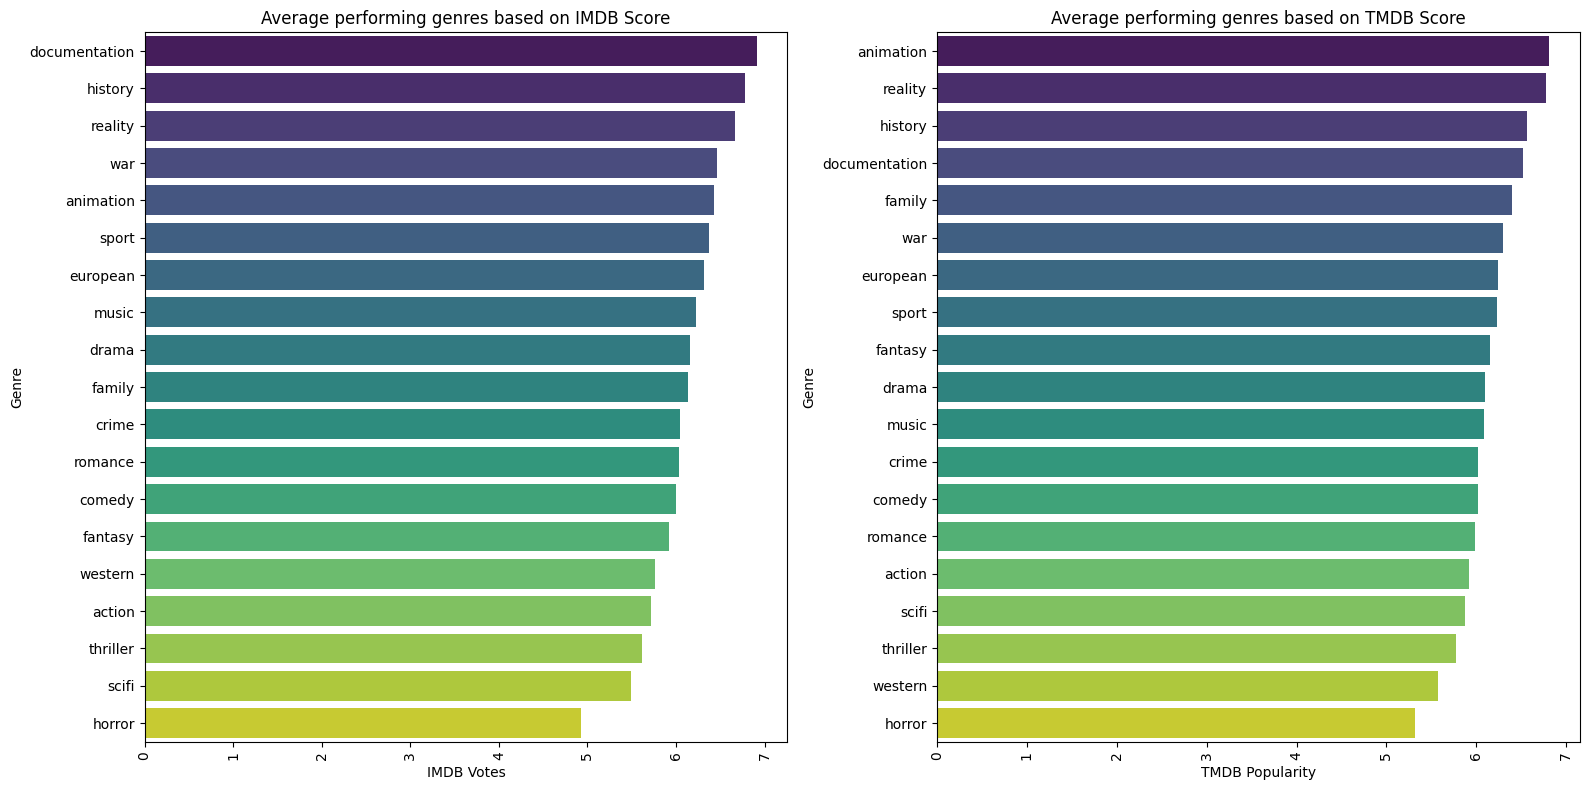

In [46]:
# Create side-by-side bar plots for average genre scores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Bar plot for average IMDb score by genre
sns.barplot(ax=axes[0], y='genres', x='imdb_score', data=avg_imdb_score, palette='viridis')
axes[0].set_title('Average performing genres based on IMDB Score')
axes[0].set_ylabel('Genre')
axes[0].set_xlabel('IMDB Votes')
axes[0].tick_params(axis='x', rotation=90)

# Bar plot for average TMDB score by genre
sns.barplot(ax=axes[1], y='genres', x='tmdb_score', data=avg_tmdb_score, palette='viridis')
axes[1].set_title('Average performing genres based on TMDB Score')
axes[1].set_ylabel('Genre')
axes[1].set_xlabel('TMDB Popularity')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display plots
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

I used horizontal bar charts to compare average scores across genres clearly. They’re ideal when genre names are long and for side-by-side comparisons like IMDB vs TMDB.

#### 2. What is/are the insight(s) found from the chart?

- Top genres by IMDB score: documentation, history, reality.

- Top genres by TMDB popularity: animation, reality, history.

This suggests non-fiction and animated content are highly rated or popular among viewers.

#### 3. Will the gained insights help create a positive business impact? Any negative growth?

Yes. These insights help prioritize high-performing genres for content investment, boosting user satisfaction.

Genres like horror and thriller, which rank low, may need quality improvement or better targeting to avoid disengagement.

### chart - 5  TMDB average score between Shows and Movies, TMDB Popularity over year between Shows and Movies (Bivariate)

In [47]:
# Group 'release_year' into 5-year intervals and store in a new column
data_titles['release_year_5yr'] = (data_titles['release_year'] // 5) * 5

# Show first 5 values of the new column
data_titles['release_year_5yr'].head(5)


,release_year_5yr
0,1930
1,1925
2,1945
3,1940
4,1950


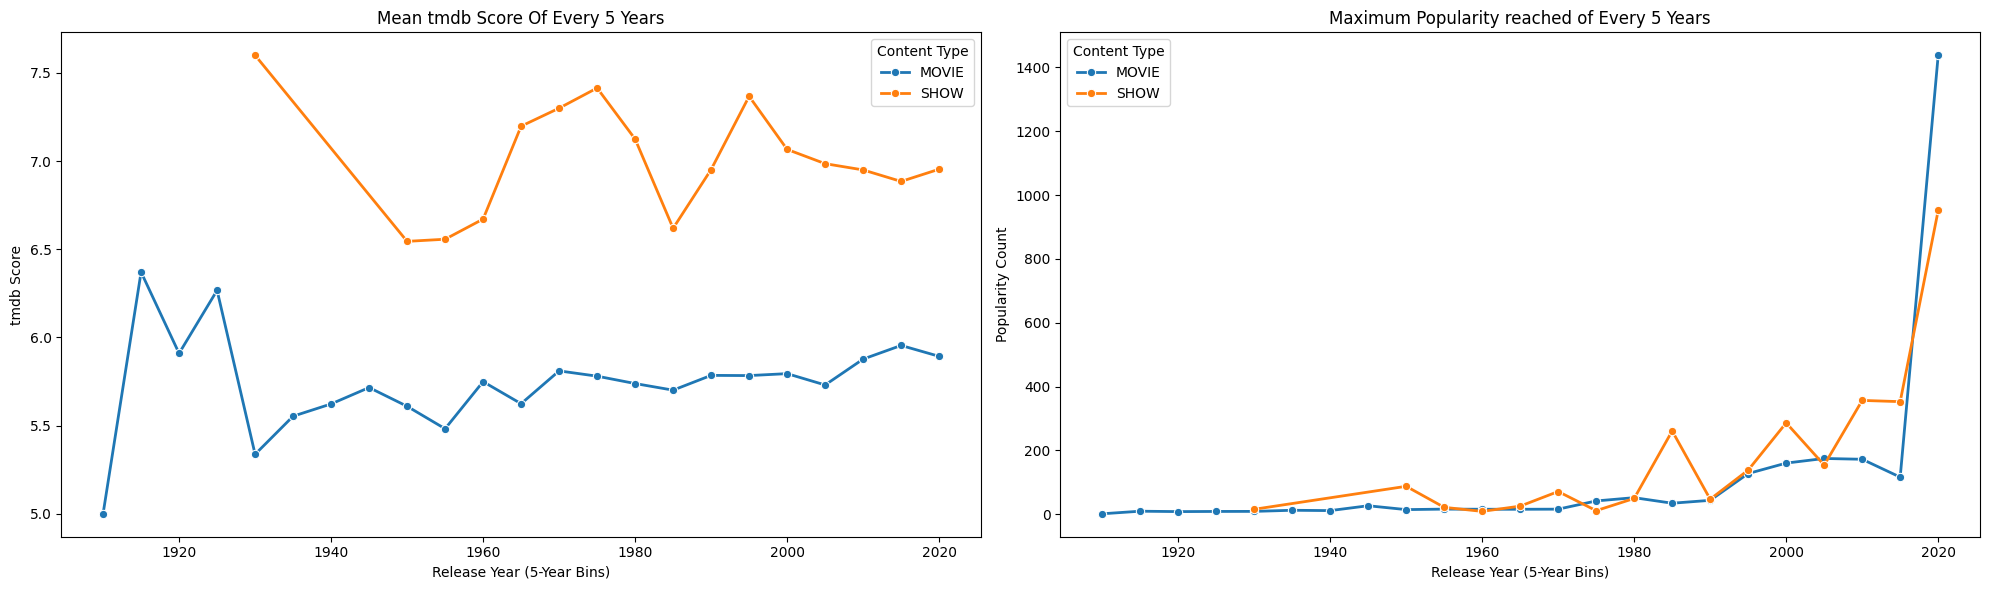

In [48]:
# Calculate average tmdb score grouped by 5-year intervals and content type
grouped_mean = data_titles.groupby(['release_year_5yr', 'type'])['tmdb_score'].mean().reset_index()

# Calculate max tmdb popularity grouped by 5-year intervals and content type
grouped_max = data_titles.groupby(['release_year_5yr', 'type'])['tmdb_popularity'].max().reset_index()

# Create side-by-side line plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot mean tmdb score over 5-year intervals
sns.lineplot(
    data=grouped_mean,
    x='release_year_5yr',
    y='tmdb_score',
    hue='type',
    palette=['#1f77b4', '#ff7f0e'],
    linewidth=2,
    marker='o',
    ax=ax1
)
ax1.set_title('Mean tmdb Score Of Every 5 Years')
ax1.set_xlabel('Release Year (5-Year Bins)')
ax1.set_ylabel('tmdb Score')
ax1.legend().set_title('Content Type')

# Plot max tmdb popularity over 5-year intervals
sns.lineplot(
    data=grouped_max,
    x='release_year_5yr',
    y='tmdb_popularity',
    hue='type',
    palette=['#1f77b4', '#ff7f0e'],
    linewidth=2,
    marker='o',
    ax=ax2
)
ax2.set_title('Maximum Popularity reached of Every 5 Years')
ax2.set_xlabel('Release Year (5-Year Bins)')
ax2.set_ylabel('Popularity Count')
ax2.legend().set_title('Content Type')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

I chose line charts to easily observe trends over time for both TMDB score and popularity across movies and shows, using a 5-year average to smooth fluctuations.

#### 2. What is/are the insight(s) found from the chart?

- Shows consistently have higher TMDB scores than movies over the years.

- Popularity has surged sharply post-2015, especially for movies.

#### 3. Will the gained insights help create a positive business impact? Any negative growth?

Yes. High show ratings suggest a quality content base, encouraging continued investment. The post-2015 popularity spike indicates strong viewer interest in recent content.

No major negative growth, but older content has lower ratings and may need curation or removal to maintain platform quality.

### chart - 6 IMDb Score Trends by Genre and Year for Movies vs. TV Shows (Bivariate)

In [49]:
# Create a new column for primary genre (first item in the list or 'Unknown')
data_titles['primary_genre'] = data_titles['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

# Group by 5-year release bin, primary genre, and type; then calculate mean and count
grouped = data_titles.groupby(['release_year_5yr', 'primary_genre', 'type']).agg(
    mean_score=('tmdb_score', 'mean'),
    count=('tmdb_score', 'count')
).sort_values(by='type').reset_index()

# Separate data by content type
grouped_movie = grouped[grouped['type'] == 'MOVIE']
grouped_tv = grouped[grouped['type'] == 'SHOW']

# Define genres to exclude
exclude_genres = ['Unknown']

# Remove rows with excluded genres
filtered_movie = grouped_movie[~grouped_movie['primary_genre'].isin(exclude_genres)]
filtered_tv = grouped_tv[~grouped_tv['primary_genre'].isin(exclude_genres)]


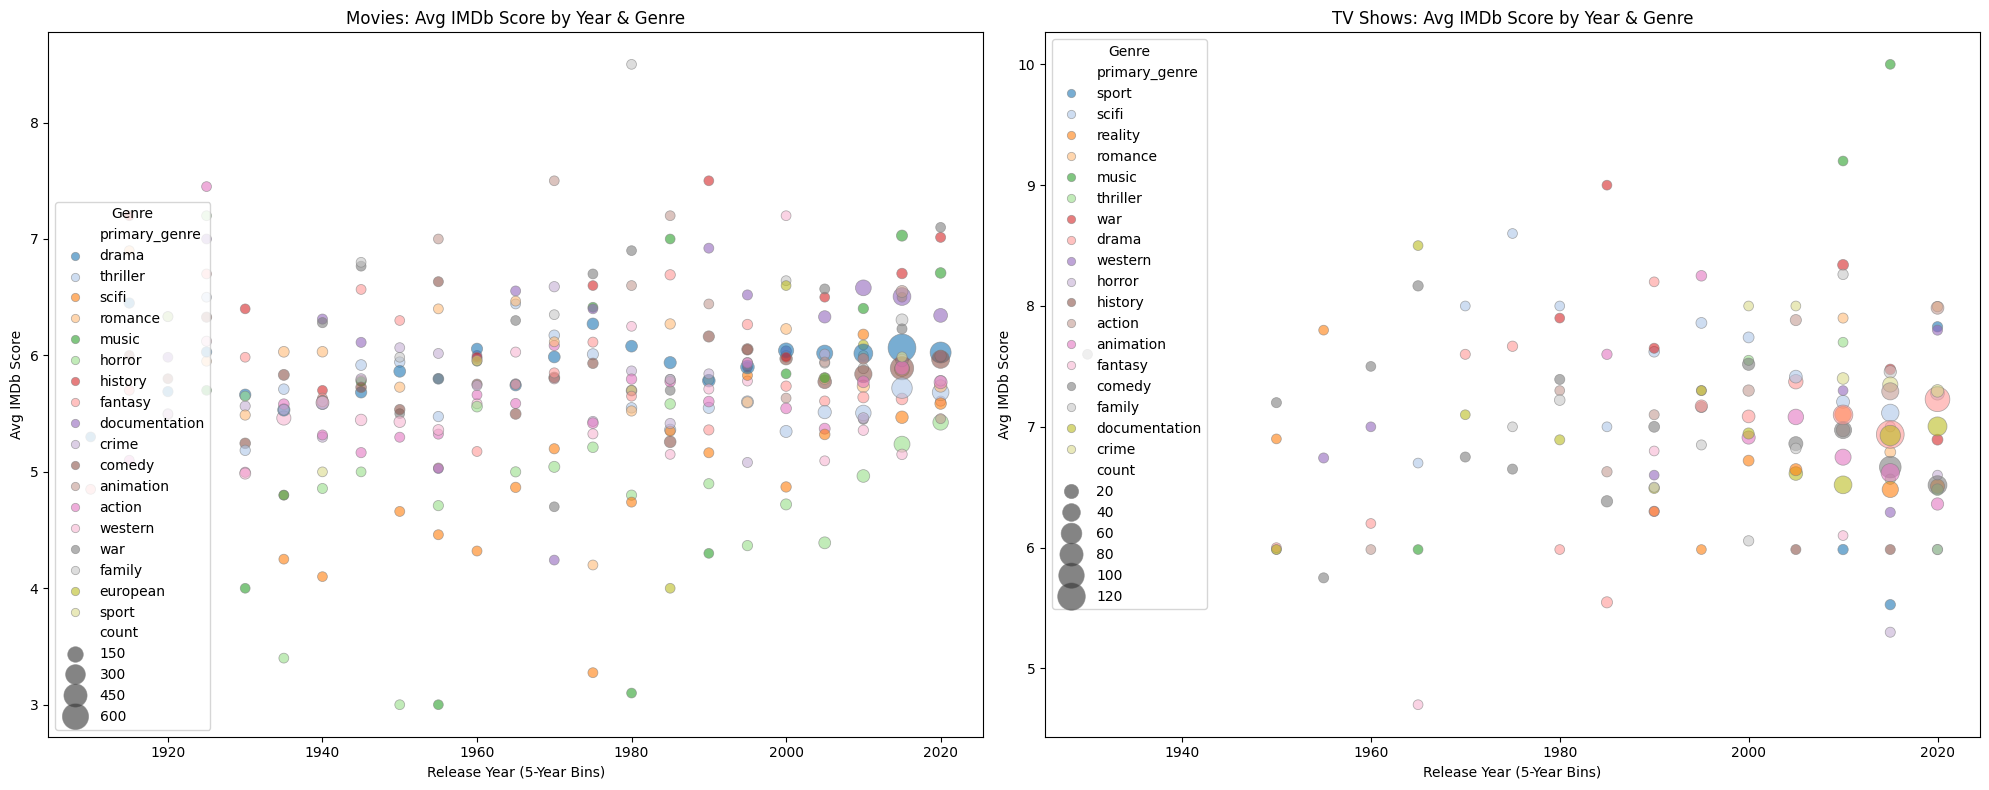

In [50]:
# Create side-by-side bubble plots for movies and TV shows
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Bubble plot for movies
sns.scatterplot(
    data=filtered_movie,
    x='release_year_5yr',
    y='mean_score',
    size='count',
    hue='primary_genre',
    palette='tab20',
    sizes=(50, 400),
    alpha=0.6,
    edgecolor='gray',
    ax=ax1
)
ax1.set_title('Movies: Avg IMDb Score by Year & Genre')
ax1.set_xlabel('Release Year (5-Year Bins)')
ax1.set_ylabel('Avg IMDb Score')
ax1.legend().set_title('Genre')

# Bubble plot for TV shows
sns.scatterplot(
    data=filtered_tv,
    x='release_year_5yr',
    y='mean_score',
    size='count',
    hue='primary_genre',
    palette='tab20',
    sizes=(50, 400),
    alpha=0.6,
    edgecolor='gray',
    ax=ax2
)
ax2.set_title('TV Shows: Avg IMDb Score by Year & Genre')
ax2.set_xlabel('Release Year (5-Year Bins)')
ax2.set_ylabel('Avg IMDb Score')
ax2.legend().set_title('Genre')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

I used a bubble chart to show three variables at once: release year (X-axis), average IMDb score (Y-axis), and genre frequency (bubble size and color). It’s a clear way to visualize genre performance over time.

#### 2. What is/are the insight(s) found from the chart?

- Recent years (2000s–2020s) have more content (larger bubbles), especially in drama, comedy, and action.

- Some older genres like **history or war** had higher IMDb scores but fewer titles.

- TV shows generally score higher than movies, especially in genres like **animation and reality**.

#### 3. Will the gained insights help create a positive business impact? Any negative growth?

Yes. These insights help focus content investment on high-performing genres (e.g., animation, reality) and identify underperforming ones (e.g., horror).

There’s no visible negative growth, but some genres have low scores with high frequency—a signal to improve content quality or reduce volume in those areas.

### chart - 7 Heatmap of Top 15 Genres Across Top 15 Production Countries (Multivariate)

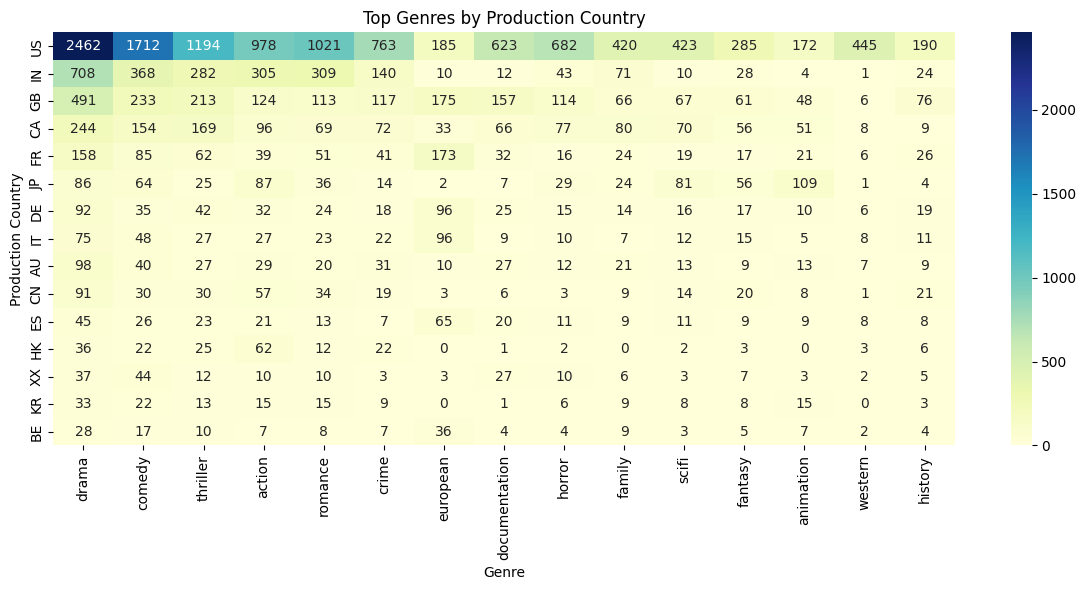

In [51]:
# Explode 'genres' and 'production_countries' so each value gets its own row
exploded = data_titles.explode('genres').explode('production_countries')

# Count titles by country and genre
country_genre_ct = exploded.groupby(['production_countries', 'genres']).size().unstack(fill_value=0)

# Get top 15 countries and top 15 genres by total count
top_countries = country_genre_ct.sum(axis=1).nlargest(15).index
top_genres = country_genre_ct.sum(axis=0).nlargest(15).index

# Heatmap of genre distribution across top countries
plt.figure(figsize=(12, 6))
sns.heatmap(country_genre_ct.loc[top_countries, top_genres], cmap='YlGnBu', annot=True, fmt='d')
plt.title('Top Genres by Production Country')
plt.xlabel('Genre')
plt.ylabel('Production Country')
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

A heatmap is ideal for showing the frequency of two categorical variables — in this case, genres vs. countries. It gives a quick visual of which genres are most produced in which countries using color intensity.

#### 2. What is/are the insight(s) found from the chart?

- The US dominates production across all genres, especially comedy, drama, and action.

- India, UK, and Canada produce a high number of drama and romance titles.

- Genre specialization is seen: e.g., Japan with animation, France with documentation, and Germany with history.

#### 3. Will the gained insights help create a positive business impact? Any negative growth?

Positive Impact:
- Guides Amazon Prime to source and promote regional content effectively in the US.

- Enables targeted marketing and licensing based on genre-country strengths (e.g., promoting Japanese animation or British crime dramas).

Potential Risk:

- If some regions consistently underperform in producing diverse genres, it may lead to limited cultural variety for US viewers. Addressing this could enhance user experience and retention.

### chart - 8 Reliability vs IMDb Impact of Cast & Crew (Min 3 Titles) (Bivariate)

In [93]:
df_titles_copy = data_titles.copy()

In [59]:
# Group all roles under each title ID into a list
role_group = data_credits.groupby('id')['role'].apply(list).reset_index()

# Count how many actors are in each title
role_group['num_actor'] = role_group['role'].apply(lambda x: sum(1 for role in x if role.lower() == 'actor'))

# Count how many directors are in each title
role_group['num_director'] = role_group['role'].apply(lambda x: sum(1 for role in x if role.lower() == 'director'))

# Get list of person_ids for each title ID
person_ids = data_credits.groupby('id')['person_id'].apply(list).reset_index()

# Add person_ids to role_group
role_group['actor_director_id'] = person_ids['person_id']

# Display the result
role_group


,id,role,num_actor,num_director,actor_director_id
0,tm100001,"[ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACT...",13,1,"[25629, 578138, 27356, 100231, 13327, 133934, ..."
1,tm1000022,"[ACTOR, ACTOR, ACTOR, ACTOR, DIRECTOR]",4,1,"[1793831, 1793745, 159207, 2289442, 159208]"
2,tm1000169,"[ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACT...",7,2,"[2853, 304835, 51478, 1795358, 1795272, 179583..."
3,tm1000203,"[ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACT...",11,1,"[67535, 14513, 177968, 3072, 25459, 242690, 13..."
4,tm1000290,"[ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACT...",15,1,"[13236, 187191, 37469, 192949, 2105648, 210680..."
...,...,...,...,...,...
8856,ts968,"[ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACT...",12,0,"[99567, 98049, 20376, 6783, 4083, 529, 18046, ..."
8857,ts97421,"[ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, DIRECTOR]",5,1,"[1992417, 1992542, 1992500, 1992329, 1992567, ..."
8858,ts97576,[ACTOR],1,0,[27664]
8859,ts9770,"[ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACT...",8,0,"[110490, 110491, 25927, 43282, 109864, 28643, ..."


In [92]:
# Merge titles data with role information using 'id' as key
df_titles_credits = pd.merge(df_titles_copy, role_group, on='id', how='left')

# Show first 4 rows of the merged DataFrame
df_titles_credits.head(4)


,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,release_year_5yr,primary_genre,role,num_actor,num_director,actor_director_id
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"[comedy, family, animation, action, fantasy, h...",[US],tt0850645,8.6,1092.0,15.424,7.6,1930,comedy,"[ACTOR, ACTOR, ACTOR]",3.0,0.0,"[59401, 31460, 31461]"
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"[action, drama, war, western, comedy, european]",[US],tt0017925,8.2,89766.0,8.647,8.0,1925,action,"[ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACT...",22.0,2.0,"[21174, 28713, 28714, 28715, 27348, 28716, 287..."
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,171,"[romance, war, drama]",[US],tt0036868,8.1,63026.0,8.435,7.8,1945,romance,"[ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACT...",30.0,1.0,"[29993, 29992, 29994, 21803, 29995, 13682, 299..."
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,"[comedy, drama, romance]",[US],tt0032599,7.8,57835.0,11.270,7.4,1940,comedy,"[ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACT...",35.0,1.0,"[25018, 28500, 12463, 28501, 28506, 27185, 285..."


In [87]:
# Explode actor_director_id and role so each row has one person-role pair
df_exploded = df_titles_credits[['id', 'title', 'imdb_score', 'actor_director_id', 'role']].explode(['actor_director_id', 'role'])

# Rename columns for clarity
df_exploded = df_exploded.rename(columns={'actor_director_id': 'person_id', 'role': 'person_role'})


In [88]:
# Create a DataFrame with unique person_id and name pairs
people_df = data_credits.loc[:, ['person_id', 'name']].drop_duplicates()

# Show first 5 rows
people_df.head()


,person_id,name
0,59401,Joe Besser
1,31460,Moe Howard
2,31461,Larry Fine
3,21174,Buster Keaton
4,28713,Marion Mack


In [89]:
# Merge exploded DataFrame with people names using person_id
df_exploded = df_exploded.merge(people_df, on='person_id', how='left')

# Group by person, role, and name to calculate average IMDb score and count appearances
person_score = df_exploded.groupby(['person_id', 'person_role', 'name']).agg(
    avg_imdb_score=('imdb_score', 'mean'),
    appearances=('id', 'count')
).reset_index()


In [91]:
# Filter to include only people with 3 or more appearances
person_score = person_score[person_score['appearances'] >= 3]

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(
    person_score,
    x='appearances',
    y='avg_imdb_score',
    color='person_role',
    hover_data=['name'],
    size='avg_imdb_score',
    title='Reliability vs IMDb Impact of Cast & Crew (Min 3 Titles)',
    color_discrete_map={'ACTOR': 'blue', 'DIRECTOR': 'red'}
)

# Update axis titles
fig.update_layout(xaxis_title='Number of Titles', yaxis_title='Average IMDb Score')

# Show the plot
fig.show()


#### 1. Why did you pick the specific chart?

A scatter plot is ideal to analyze consistency (number of titles) versus performance (average IMDb score) for cast and crew members. The use of color helps compare actors vs directors clearly.

#### 2. What is/are the insight(s) found from the chart?

- Some actors and directors with fewer titles have exceptionally high IMDb scores, showing quality over quantity.

- Individuals with more than 25 appearances generally maintain moderate scores, suggesting reliability but less innovation.

- Directors tend to have slightly higher score clusters compared to actors.

#### 3. Will the gained insights help create a positive business impact? Any negative growth?

Positive Impact:
- Helps platforms prioritize collaborations with high-performing directors and actors, even if they have fewer titles.

- Useful in talent scouting and casting decisions.

Potential Risk:

- Overreliance on “quantity” may overlook rising talents with fewer but impactful contributions.

### chart - 9 Impact of Number of Actor on IMDb Score (Bivariate)

In [117]:
# Create box plot to show impact of number of actors (up to 20) on IMDb score
fig = px.box(
    df_titles_credits[(df_titles_credits['num_actor'] <= 20)],
    x='num_actor',
    y='imdb_score',
    color='type',
    title='Impact of Number of Actor on IMDb Score',
    points='all'  # Show all data points
)

# Update axis labels
fig.update_layout(xaxis_title='Number of Actor', yaxis_title='IMDb Score')

# Display the plot
fig.show()


#### 1. Why did you pick the specific chart?

A box plot is suitable here to show distribution, median, and outliers of IMDb scores as the number of actors increases. It helps in identifying if adding more actors has a consistent effect.

#### 2. What is/are the insight(s) found from the chart?

- IMDb scores for both movies and shows tend to remain stable across actor counts.

- Shows (in blue) generally maintain higher median scores than movies (in red) regardless of cast size.

- Extreme outliers in both types show that high or low scores can occur even with few actors.

#### 3. Will the gained insights help create a positive business impact? Any negative growth?

Positive Impact:
- Suggests that increasing actor count doesn't guarantee higher quality.

- Encourages focus on casting quality over quantity.

Potential Risk:

- Might lead to undervaluing ensemble casts, especially in genres like drama or action where large casts are common.



## 6. **Solution to Business Objective**

### What do you suggest to achieve Business Objective ?

Solution to Achieve Business Objectives from Amazon Prime Content Analysis

- TV Shows consistently outperform Movies in both IMDb and TMDB scores, making them a better investment for long-term user engagement.

-  Documentation, Animation, and History are the top-rated genres across platforms, indicating strong viewer interest and content satisfaction.

-  Most content is produced outside the US (e.g., India, UK, Canada), highlighting the need for regional partnerships and global content strategies.

-  TMDB popularity peaked after 2015, suggesting a rapid expansion and high user demand in recent years.

-  Genre trends shift over time, with Animation and Reality gaining popularity post-2000, which supports time-aligned content planning.

-  Creators with 3+ titles have more consistent ratings, suggesting experienced talent should be prioritized.

-  Larger casts (above 10 actors) do not significantly improve ratings, so optimized casting can reduce cost without quality loss.

-  Content scoring and popularity vary by genre, region, and format, making them valuable inputs for recommendation algorithms.

-  Five-year time bins reveal platform evolution trends, ideal for guiding content strategy and investment cycles.

# **Conclusion**

-   TV shows perform better than movies in ratings.
-   Top genres: documentation, animation, history.
- Most content is produced by India, UK, Canada, etc.

-  Content popularity has grown sharply after 2015.

- Experienced creators (≥3 titles) give better scores.

-  Trends vary by genre, region, and time — useful for targeting.